In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
#for media
from pygame import mixer

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
tf.__version__

'2.8.0'

In [3]:
print("Num GPUs available: " ,len(tf.config.list_physical_devices('GPU')))

Num GPUs available:  0


In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
import sys
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

# Preparing data, Data Agumentation by rescaling and reseizing, 255 total pixel size

In [7]:
#Rescaling 
batch_size = 16
training_datagenerator = ImageDataGenerator(rescale=1.0/255,horizontal_flip=True, 
                                             vertical_flip=True, 
                                             zoom_range=0.2, shear_range=0.2,
                                            width_shift_range=0.2, height_shift_range=0.2,
                                           validation_split=0.2)


In [8]:
#Data is being divided into training and validation.
#Reseizing
training = training_datagenerator.flow_from_directory(r"C:\Users\chand\OneDrive\Desktop\Project_Phase\FireDataset\Training Data", 
                                                       target_size = (256,256), color_mode = 'rgb', 
                                                       class_mode = 'categorical', batch_size = 16,
                                                       subset = 'training')


#validation means to find and optimiz the best model to solve a given problem 
validation=training_datagenerator.flow_from_directory(r"C:\Users\chand\OneDrive\Desktop\Project_Phase\FireDataset\Training Data",
                                                target_size=(256, 256),color_mode='rgb',
                                       class_mode='categorical', batch_size=16,subset='validation')

Found 11725 images belonging to 3 classes.
Found 2931 images belonging to 3 classes.


In [9]:
validation.class_indices

{'Fire': 0, 'NoFire': 1, 'Smoke': 2}

In [10]:
training.class_indices

{'Fire': 0, 'NoFire': 1, 'Smoke': 2}

# CNN architecture


In [11]:
#Cnn Architechture or Initializing cnn Architechture
cnn=tf.keras.models.Sequential()

#Adding 1st layer / Input Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', input_shape=[256,256,3]))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Adding 2nd layer 
cnn.add(tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu'))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Adding 3rd layer 
cnn.add(tf.keras.layers.Conv2D(filters=256, padding='same', kernel_size=3, activation='relu'))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#falttened layer
cnn.add(tf.keras.layers.Flatten())

#hidden Layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#output Layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

In [13]:
#after every model to check 
ckeckpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\chand\OneDrive\Desktop\Project_Phase\FireDataset\Training models\model.h5', 
                                              monitor='val_loss',
                                              mode="min",
                                              save_weights_only=False,
                                              save_best_only=True)
callbacks = ckeckpoint

In [14]:
#Training the CNN Model i.e. Compile and Train
cnn.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit_generator(training, validation_data=validation, epochs=2, 
                  steps_per_epoch=training.samples//16,
                  validation_steps=validation.samples//16,
                  callbacks = callbacks)
#"steps_per_epoch=  It is used to define how many batches of samples to use in one epoch. 
#It is used to declaring one epoch finished and starting the next epoch"

C:\Users\chand\AppData\Local\Temp\ipykernel_25472\519380754.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(training, validation_data=validation, epochs=2,


Epoch 1/2
732/732 [==============================] - 1212s 2s/step - loss: 0.0892 - accuracy: 0.9572 - val_loss: 0.0670 - val_accuracy: 0.9686
Epoch 2/2
732/732 [==============================] - 1142s 2s/step - loss: 0.0513 - accuracy: 0.9734 - val_loss: 0.0508 - val_accuracy: 0.9833


cnn.summary()

In [14]:
image_for_testing=r'C:\Users\chand\OneDrive\Desktop\Project_Phase\FireDataset\Training Data\Fire\1.png'

In [15]:
image_for_testing

'C:\\Users\\chand\\OneDrive\\Desktop\\Project_Phase\\FireDataset\\Training Data\\Fire\\1.png'

In [16]:
test_image=image.load_img(image_for_testing,target_size=(256,256))

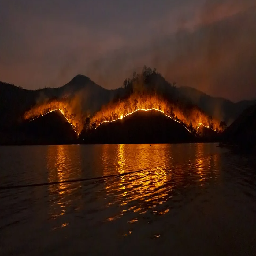

In [17]:
test_image

In [18]:
test_image = image.img_to_array(test_image)

In [19]:
test_image

array([[[65., 58., 63.],
        [65., 58., 62.],
        [67., 57., 61.],
        ...,
        [85., 61., 55.],
        [85., 61., 53.],
        [87., 61., 51.]],

       [[64., 57., 61.],
        [65., 58., 61.],
        [67., 58., 59.],
        ...,
        [86., 61., 53.],
        [86., 61., 51.],
        [87., 61., 50.]],

       [[64., 57., 61.],
        [65., 58., 61.],
        [66., 57., 57.],
        ...,
        [87., 61., 53.],
        [87., 61., 51.],
        [87., 61., 49.]],

       ...,

       [[26., 18., 14.],
        [27., 19., 15.],
        [25., 16., 13.],
        ...,
        [23., 13.,  8.],
        [23., 13.,  8.],
        [25., 12.,  8.]],

       [[26., 18., 14.],
        [26., 18., 14.],
        [25., 17., 13.],
        ...,
        [27., 16., 11.],
        [20.,  9.,  4.],
        [28., 15., 11.]],

       [[24., 15., 13.],
        [24., 15., 13.],
        [25., 14., 13.],
        ...,
        [21., 10.,  6.],
        [21., 10.,  5.],
        [24., 11.,  6.]]

In [20]:
test_image=test_image/255

In [21]:
test_image

array([[[0.25490198, 0.22745098, 0.24705882],
        [0.25490198, 0.22745098, 0.24313726],
        [0.2627451 , 0.22352941, 0.23921569],
        ...,
        [0.33333334, 0.23921569, 0.21568628],
        [0.33333334, 0.23921569, 0.20784314],
        [0.34117648, 0.23921569, 0.2       ]],

       [[0.2509804 , 0.22352941, 0.23921569],
        [0.25490198, 0.22745098, 0.23921569],
        [0.2627451 , 0.22745098, 0.23137255],
        ...,
        [0.3372549 , 0.23921569, 0.20784314],
        [0.3372549 , 0.23921569, 0.2       ],
        [0.34117648, 0.23921569, 0.19607843]],

       [[0.2509804 , 0.22352941, 0.23921569],
        [0.25490198, 0.22745098, 0.23921569],
        [0.25882354, 0.22352941, 0.22352941],
        ...,
        [0.34117648, 0.23921569, 0.20784314],
        [0.34117648, 0.23921569, 0.2       ],
        [0.34117648, 0.23921569, 0.19215687]],

       ...,

       [[0.10196079, 0.07058824, 0.05490196],
        [0.10588235, 0.07450981, 0.05882353],
        [0.09803922, 0

In [22]:
test_image=np.expand_dims(test_image,axis=0)

In [23]:
test_image

array([[[[0.25490198, 0.22745098, 0.24705882],
         [0.25490198, 0.22745098, 0.24313726],
         [0.2627451 , 0.22352941, 0.23921569],
         ...,
         [0.33333334, 0.23921569, 0.21568628],
         [0.33333334, 0.23921569, 0.20784314],
         [0.34117648, 0.23921569, 0.2       ]],

        [[0.2509804 , 0.22352941, 0.23921569],
         [0.25490198, 0.22745098, 0.23921569],
         [0.2627451 , 0.22745098, 0.23137255],
         ...,
         [0.3372549 , 0.23921569, 0.20784314],
         [0.3372549 , 0.23921569, 0.2       ],
         [0.34117648, 0.23921569, 0.19607843]],

        [[0.2509804 , 0.22352941, 0.23921569],
         [0.25490198, 0.22745098, 0.23921569],
         [0.25882354, 0.22352941, 0.22352941],
         ...,
         [0.34117648, 0.23921569, 0.20784314],
         [0.34117648, 0.23921569, 0.2       ],
         [0.34117648, 0.23921569, 0.19215687]],

        ...,

        [[0.10196079, 0.07058824, 0.05490196],
         [0.10588235, 0.07450981, 0.05882353]

In [24]:
predict=cnn.predict(test_image)
result=np.argmax(predict[0], axis=0)
result

0

#Alert Alarm
from pygame import mixer

def fire_Alarm():
    mixer.init() 
    sound=mixer.Sound("fire.wav")
    sound.play()

In [25]:
if result == 0:
    print("Fire")
    mixer.init() 
    sound=mixer.Sound("fire4.mp3")
    sound.play()
elif result == 1:
    print("NoFire")
    mixer.init() 
    sound=mixer.Sound("NoFire.mp3")
    sound.play()
elif result == 2:
    print("Smoke")
    mixer.init() 
    sound=mixer.Sound("alert.mp3")
    sound.play()
else:
    print("Everything is Ok")
    mixer.init() 
    sound=mixer.Sound("ok.mp3")
    sound.play()

Fire
